# Module 1 Final Project Submission

* Student name: Noah X. Deutsch
* Student pace: Self Paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Objective

The goal of this project is to clean, explore, and model the **King County House Sales** dataset with a multivariate linear regression to **predict the sale price of houses as accurately as possible.**

## My Approach (OSEMiN)

### Obtain
* Import Data File
* Familiarize myself with the dataset

### Scrub
* Subsampling to Reduce Size (as needed)
* Ensure Appropriate Column Data Types
* Deal With Null Values
* Checking For Multicollinearity
* Normalizing Numerical Data 
* One-Hot Encode Categorical Data 

### Explore
* Understand the Distribution (Hist + KDE, Joint Plots)
* Check for the linearity assumption between predictors and target variable

### Model
* Fit Initial Model
* Check P vals, R^2, Multicollinearity, Normality, and Homoscedasticity
* Refine, Refine, Refine
* Cross Validation

### iNterpret
* What does this all mean?

# Step 1. Obtain

### Column Names and descriptions for Kings County Data Set (from the included column_names.md file)
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [400]:
#Loading in some key packages to be used throughout the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [401]:
# Obtaining our data set
kcdf = pd.read_csv('kc_house_data.csv')

In [402]:
#Taking an look look at rows and columns
kcdf.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [403]:
#Understanding shape and current column data types
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [404]:
#Looking at descriptive statistics
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [405]:
uniqueValues = kcdf.nunique()
uniqueValues

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

# Step 2. Scrub
* Subsampling to Reduce Size (as needed)
* Ensure Appropriate Column Data Types
* Deal With Null Values
* Checking For Multicollinearity
* Normalizing Numerical Data 
* One-Hot Encode Categorical Data 

### Subsampling to Reduce Size

In [406]:
len(kcdf)

21597

In [407]:
#Subsampling not needed. Dataset is already a managable size.

### Ensure Appropriate Column Data Types

#### Let's start by tagging the columns in advance by which datatype they should be. Then we can compare to how they are currently.
* **id** - unique identified for a house **––– CUT, not useful to model**
* **dateDate** - house was sold **––– STR**
* **pricePrice** -  is prediction target **––– NUM**
* **bedroomsNumber** -  of Bedrooms/House **––– NUM**
* **bathroomsNumber** -  of bathrooms/bedrooms **––– NUM**
* **sqft_livingsquare** -  footage of the home **––– NUM**
* **sqft_lotsquare** -  footage of the lot **––– NUM**
* **floorsTotal** -  floors (levels) in house **––– NUM**
* **waterfront** - House which has a view to a waterfront **––– CAT**
* **view** - Has been viewed **––– CAT**
* **condition** - How good the condition is ( Overall ) **––– UNSURE, explore**
* **grade** - overall grade given to the housing unit, based on King County grading system **––– UNSURE, explore**
* **sqft_above** - square footage of house apart from basement **––– NUM**
* **sqft_basement** - square footage of the basement **––– NUM**
* **yr_built** - Built Year **––– NUM** 
* **yr_renovated** - Year when house was renovated **––– NUM**
* **zipcode** - zip **––– CAT**
* **lat** - Latitude coordinate **––– NUM**
* **long** - Longitude coordinate **––– NUM**
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors **––– NUM**
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors **––– NUM**

In [408]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Actions to take

id               CUT

date             KEEP

price            KEEP

bedrooms         KEEP

bathrooms        KEEP

sqft_living      KEEP

sqft_lot         KEEP

floors           KEEP

waterfront       MODIFY

view             MODIFY

condition        EXPLORE

grade            EXPLORE

sqft_above       KEEP

sqft_basement    MODIFY

yr_built         KEEP

yr_renovated     KEEP

zipcode          MODIFY

lat              KEEP

long             KEEP

sqft_living15    KEEP

sqft_lot15       KEEP

In [409]:
#Let's start by dropping the ID collumn 
kcdf = kcdf.drop(['id'],axis=1)
kcdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [410]:
#Now let's adjust/explore the rest

#waterfront to string (cat later)
kcdf['waterfront'] = kcdf['waterfront'].astype('str')
kcdf['waterfront'].unique()

array(['nan', '0.0', '1.0'], dtype=object)

In [411]:
#view to string (cat later)
kcdf['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [412]:
#I expected this to be a binary 0 and 1. 
#But since it is actually showing the number of times a space was viewed, we can leave it as numerical for now.

In [413]:
#let's explore condition
kcdf['condition'].unique()

array([3, 5, 4, 1, 2])

In [414]:
#clearly this should be catagorical, so we'll swtich it to a string for now
kcdf['condition'] = kcdf['condition'].astype('str')
kcdf['condition'].unique()

array(['3', '5', '4', '1', '2'], dtype=object)

In [415]:
#let's explore condition
kcdf['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [416]:
#this should be catagorical, since we dont know if there's any numerical relationship.
#so we'll swtich it to a string for now
kcdf['grade'] = kcdf['grade'].astype('str')
kcdf['grade'].unique()

array(['7', '6', '8', '11', '9', '5', '10', '12', '4', '3', '13'],
      dtype=object)

In [417]:
kcdf['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [418]:
#Looks like all the values can be converted to ints except for a '?' for NaN
#let's see how many of those there are...

countq = kcdf['sqft_basement'].apply(lambda x: True if '?' in list(x) else False)
numOfRows = len(countq[countq == True].index)
numOfRows

454

In [419]:
#Okay, so there are 454 rows with a '?' for sqft_basement. That's roughly 2% of our overall data.
#That's not too bad. So let's go ahead and cut these rows so we can convert the rest to int.
initial_length = len(kcdf)
kcdf = kcdf.loc[kcdf["sqft_basement"] != '?']
adjusted_length = len(kcdf)
initial_length - adjusted_length


454

In [420]:
#Now we can safely convert the column to ints
kcdf['sqft_basement'] = kcdf['sqft_basement'].astype(np.float16)
kcdf['sqft_basement'] = kcdf['sqft_basement'].astype(int)
kcdf['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  710,  840,  380,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960,  280,  870, 1100,  460,
       1400,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,  350,
        935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,  340,
        470,  370,  140, 1760,  130,  520,  890, 1110,  150, 1720,  810,
        190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,  310,  930,
       1390,  610, 1830, 1300,  510, 1330, 1590,  920, 1320, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

In [421]:
#Last up, zipcode. This needs to be categorical
kcdf['zipcode'] = kcdf['zipcode'].astype('str')
kcdf['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: object

In [422]:
#Let's do a final check of data types to make sure we're in a good place.

kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null object
view             21082 non-null float64
condition        21143 non-null object
grade            21143 non-null object
sqft_above       21143 non-null int64
sqft_basement    21143 non-null int64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null object
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(7), int64(8), object(5)
memory usage: 3.4+ MB


### Deal With Null Values

In [423]:
#We already took out some null values for sqft_basement

#let's see how many we have left

kcdf.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [424]:
#With only 61 NaN values for view, we can definitely cut those ones out of the data set

initial_length = len(kcdf)
kcdf = kcdf.loc[kcdf["view"] >= 0]
adjusted_length = len(kcdf)
initial_length - adjusted_length

61

In [425]:
#lets take a closer look at year renovated
kcdf['yr_renovated'].describe()

count    17340.000000
mean        83.111419
std        398.756281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [426]:
#In addition to having lots of NAN values...
#We've also got a ton of 0 values, which can be assumed to mean there has been no rennovation.

#lets look at the actual dates...
test = kcdf.loc[kcdf["yr_renovated"] > 0]
test['yr_renovated'].describe()

count     722.000000
mean     1996.055402
std        15.440898
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.750000
max      2015.000000
Name: yr_renovated, dtype: float64

In [427]:
#Based on this, I think it may be best to bin these.
#-----
#No rennovation (including NaNs and 0s) 
#Rennovation1 (1934-1953)
#Rennovation2 (1954-1973)
#Rennovation3 (1974-1993)
#Rennovation4 (1994-2015)

#turn all NaNs to 0s
kcdf['yr_renovated'] = kcdf['yr_renovated'].fillna(0)
kcdf['yr_renovated'].isna().sum()

0

In [428]:
#Now we can bin!

bins = pd.IntervalIndex.from_tuples([(-1,1),(1933, 1953), (1953, 1973), (1973, 1993),(1993, 2016)])
sample = kcdf['yr_renovated']
binned_yr_renovated = pd.cut(sample, bins)
kcdf['binned_yr_renovated'] = binned_yr_renovated

kcdf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'binned_yr_renovated'],
      dtype='object')

In [429]:
#and lastly, remove the original 'yr_renovated'
kcdf = kcdf.drop(['yr_renovated'],axis=1)
kcdf.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'binned_yr_renovated'],
      dtype='object')

In [430]:
#and let's do a final check before moving on

kcdf.isna().sum()

date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
binned_yr_renovated    0
dtype: int64

In [431]:
#Looking great!

### Checking For Multicollinearity


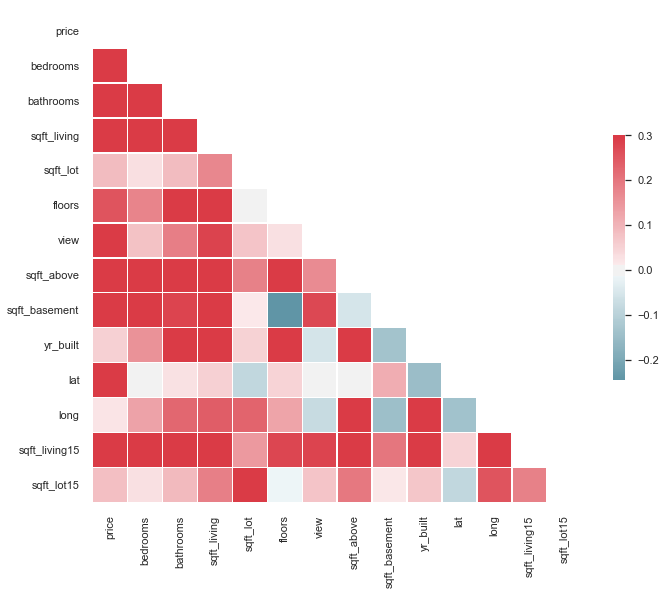

In [432]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Style
sns.set(style="white")

#Covariance matrix
corr = kcdf.corr()

#Generate a mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [433]:
#Not too bad! Lot's of weak correlations but nothing problematic. We can proceed.

### Normalizing Numerical Data 


In [434]:
#Zscore normalization for our numerical data
for col in kcdf.columns:
    if col == 'price':
        pass
    elif kcdf[col].dtypes == 'float64':
        kcdf[col] = (kcdf[col] - kcdf[col].mean()) / kcdf[col].std()
    elif kcdf[col].dtypes == 'int64':
        kcdf[col] = (kcdf[col] - kcdf[col].mean()) / kcdf[col].std()
    else:
        print (str(col) + ': dont normalize')


kcdf.head()

date: dont normalize
waterfront: dont normalize
condition: dont normalize
grade: dont normalize
zipcode: dont normalize
binned_yr_renovated: dont normalize


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,binned_yr_renovated
0,10/13/2014,221900.0,-0.402600,-1.452748,-0.980938,-0.228973,-0.915179,nan,-0.304976,3,7,-0.735179,-0.659175,-0.546440,98178,-0.354849,-0.306933,-0.943655,-0.260878,"(-1, 1]"
1,12/9/2014,538000.0,-0.402600,0.174556,0.533460,-0.190307,0.938835,0.0,-0.304976,3,7,0.459940,0.245788,-0.682852,98125,1.159208,-0.747879,-0.433112,-0.187615,"(1973, 1993]"
2,2/25/2015,180000.0,-1.483686,-1.452748,-1.427631,-0.123322,-0.915179,0.0,-0.304976,3,6,-1.230128,-0.659175,-1.296702,98028,1.281170,-0.136245,1.069344,-0.172034,"(-1, 1]"
3,12/9/2014,604000.0,0.678486,1.150938,-0.131132,-0.244760,-0.915179,0.0,-0.304976,5,7,-0.892114,1.399616,-0.205413,98136,-0.285569,-1.274170,-0.914481,-0.284820,"(-1, 1]"
4,2/18/2015,510000.0,-0.402600,-0.150905,-0.436190,-0.169954,-0.915179,0.0,-0.304976,3,8,-0.131584,-0.659175,0.544849,98074,0.407231,1.200818,-0.272656,-0.192624,"(-1, 1]"


In [435]:
#Great! We're ready to move on.

### One-Hot Encode Categorical Data


In [436]:
#before encoding our Cat data, let's go ahead and drop the date column 
#because, as in past examples, we are creating a generalized model and will not be making use of any time series data.

kcdf = kcdf.drop(['date'],axis=1)
kcdf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'binned_yr_renovated'],
      dtype='object')

In [437]:
kcdf = pd.get_dummies(kcdf)
kcdf.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,sqft_basement,yr_built,...,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,"binned_yr_renovated_(-1, 1]","binned_yr_renovated_(1933, 1953]","binned_yr_renovated_(1953, 1973]","binned_yr_renovated_(1973, 1993]","binned_yr_renovated_(1993, 2016]"
0,221900.0,-0.402600,-1.452748,-0.980938,-0.228973,-0.915179,-0.304976,-0.735179,-0.659175,-0.546440,...,0,1,0,0,0,1,0,0,0,0
1,538000.0,-0.402600,0.174556,0.533460,-0.190307,0.938835,-0.304976,0.459940,0.245788,-0.682852,...,0,0,0,0,0,0,0,0,1,0
2,180000.0,-1.483686,-1.452748,-1.427631,-0.123322,-0.915179,-0.304976,-1.230128,-0.659175,-1.296702,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,0.678486,1.150938,-0.131132,-0.244760,-0.915179,-0.304976,-0.892114,1.399616,-0.205413,...,0,0,0,0,0,1,0,0,0,0
4,510000.0,-0.402600,-0.150905,-0.436190,-0.169954,-0.915179,-0.304976,-0.131584,-0.659175,0.544849,...,0,0,0,0,0,1,0,0,0,0


In [438]:
#all set!
kcdf.iloc[:,0:20].columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_0.0', 'waterfront_1.0',
       'waterfront_nan', 'condition_1', 'condition_2', 'condition_3'],
      dtype='object')

# Step 3. Explore
* Understand the Distribution (Hist + KDE, Joint Plots)
* Check for the linearity assumption between predictors and target variable

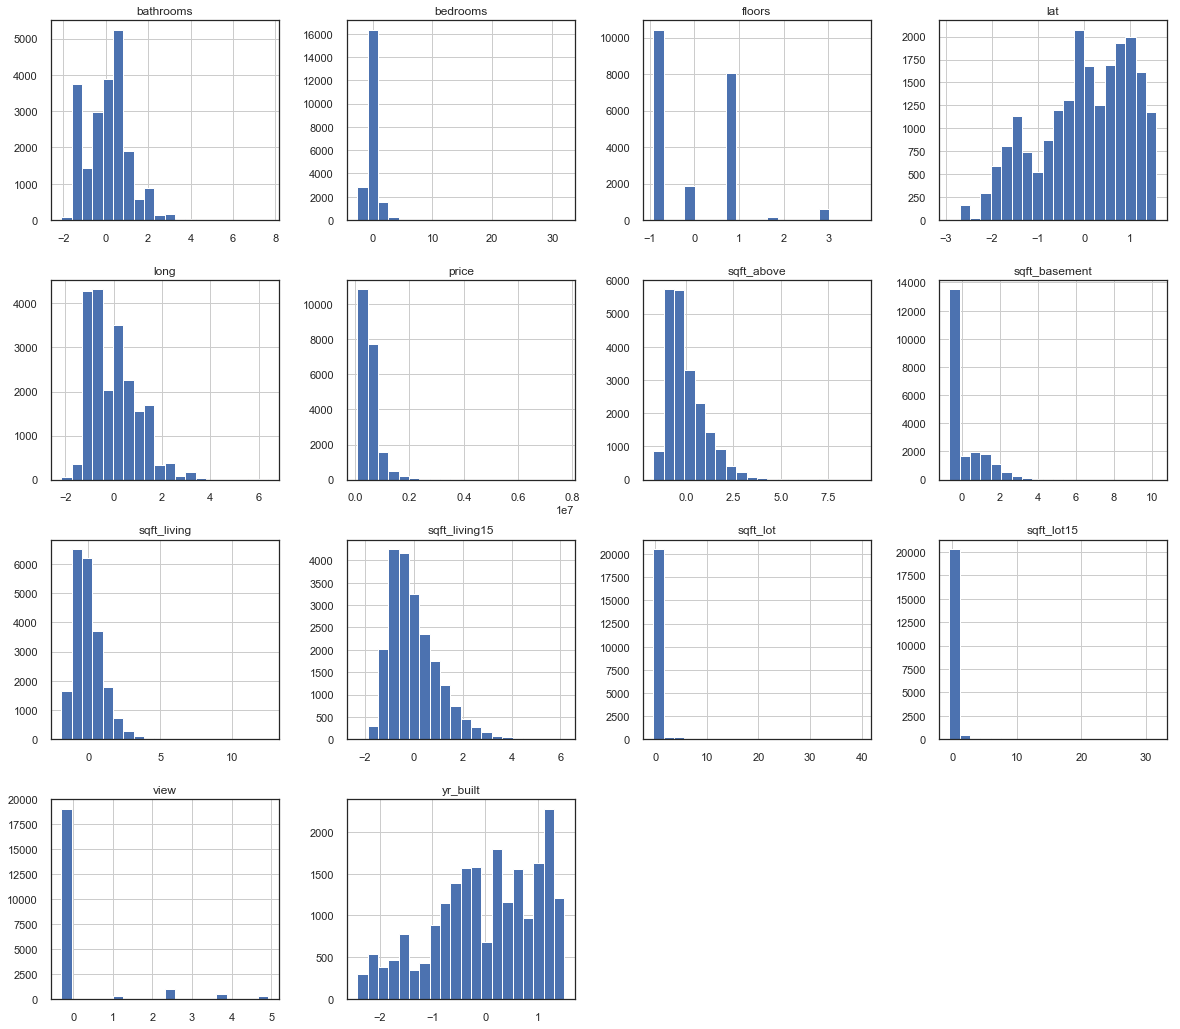

In [439]:
#Let's visualize our cleaned data to get a feel for the distributions (leaving out our cat data)
kcdf.iloc[:,0:14].hist(figsize = (20,18),bins=20);

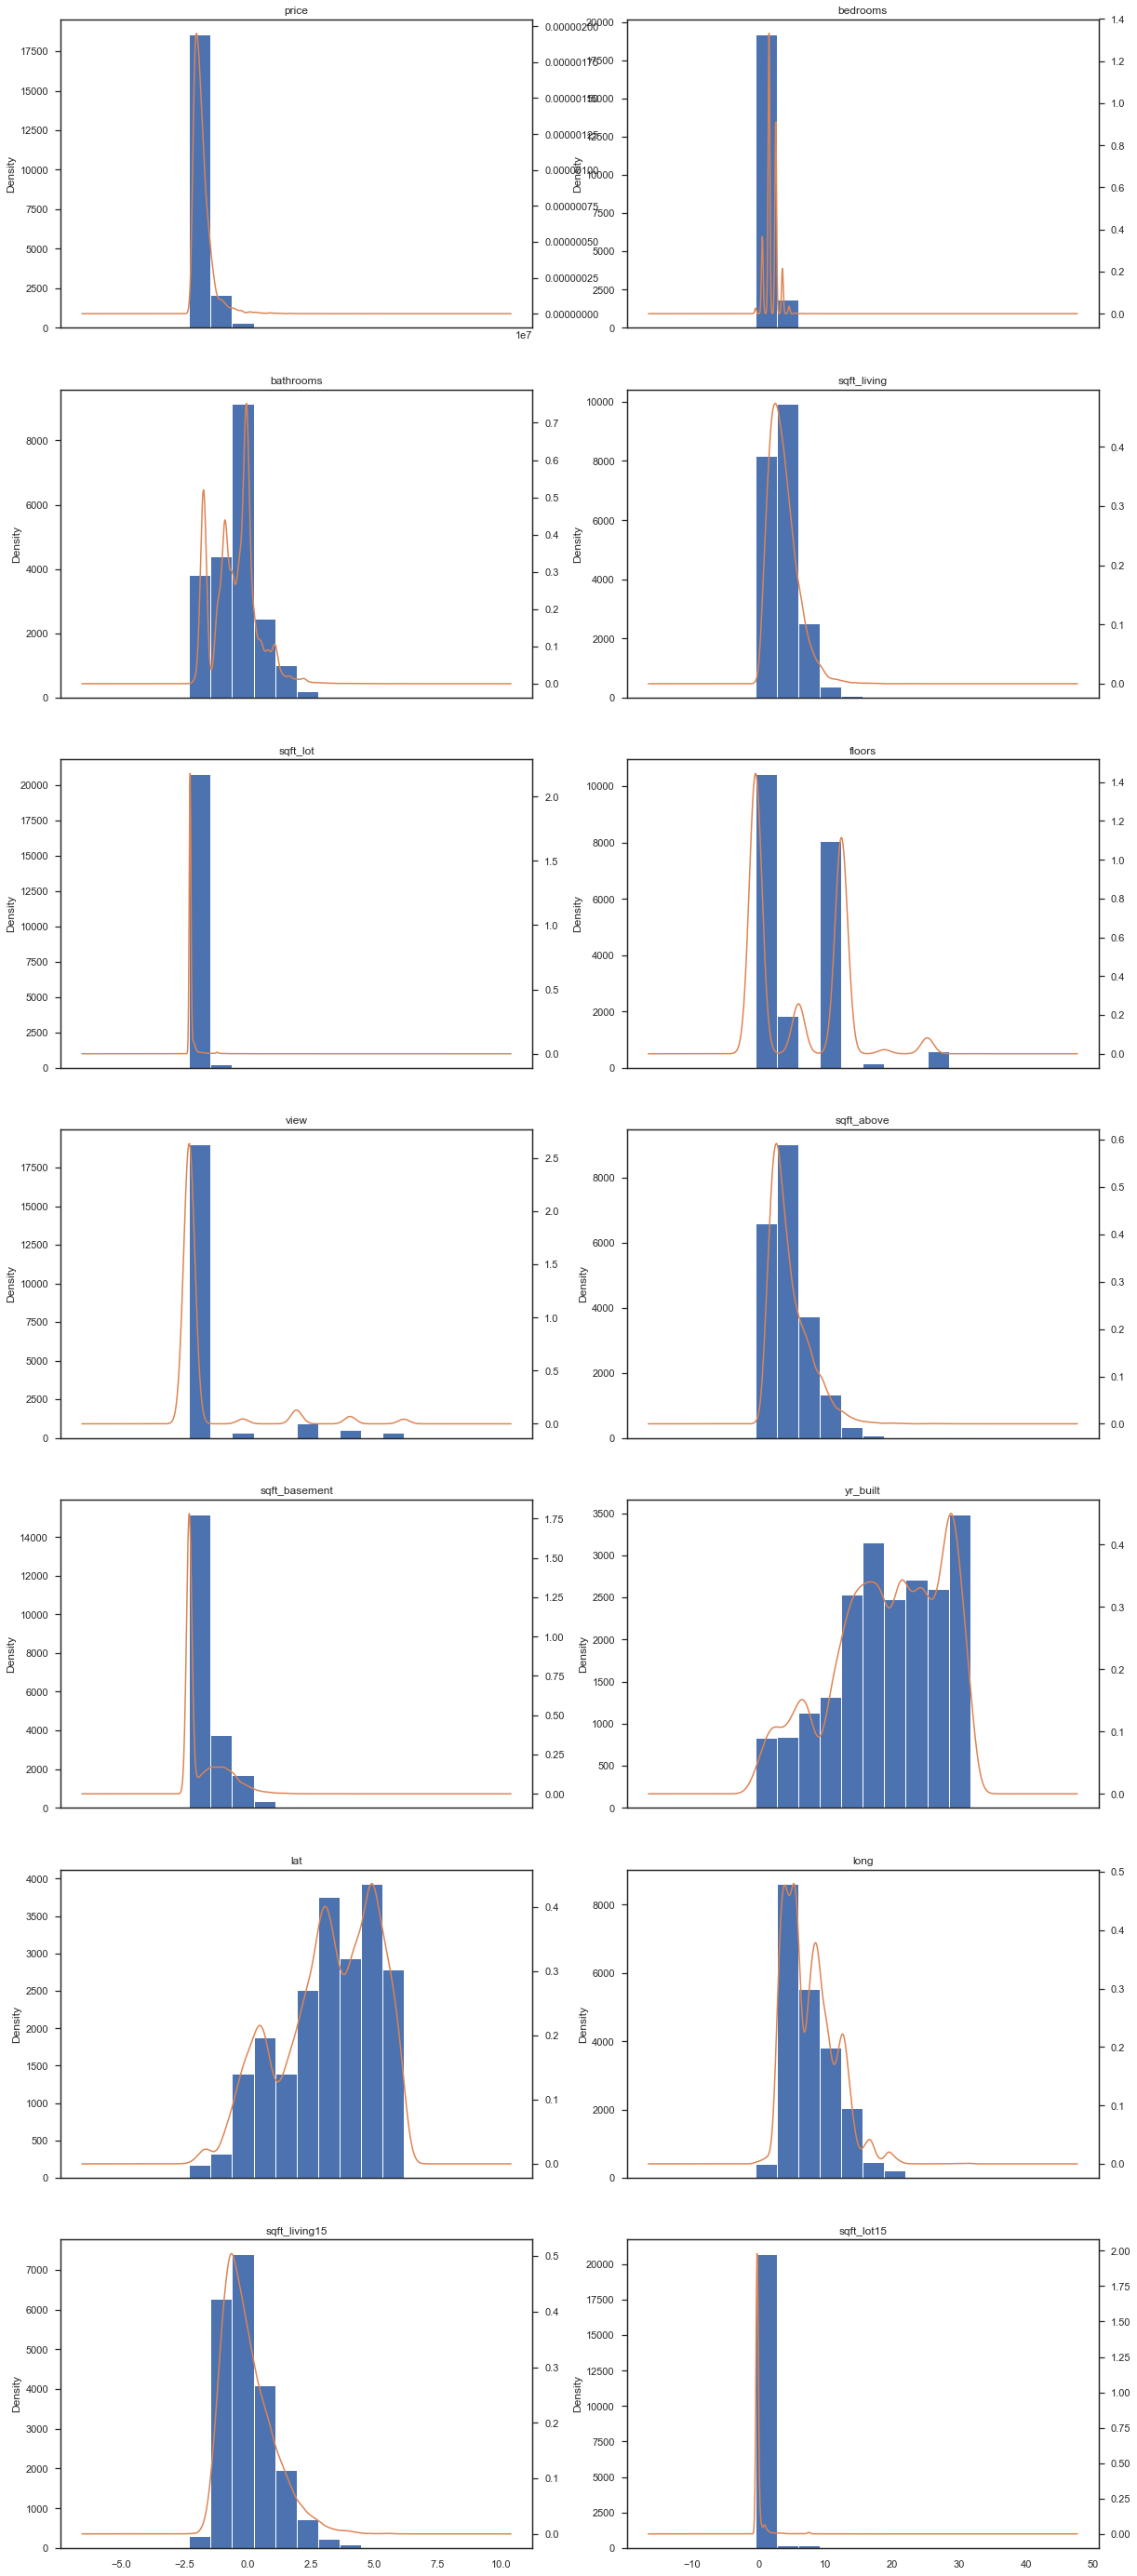

In [440]:
#lets add the KDEs...

fig, ax = plt.subplots(7,2, figsize=(20, 50)) 
ax = ax.ravel()

for i in range(14):
    ax[i] = kcdf.iloc[:,i].plot(kind='hist', ax=ax[i])
    ax[i] = kcdf.iloc[:,i].plot(kind='kde', ax=ax[i], secondary_y=True)
    plt.title(kcdf.columns[i])

/Users/noahxdeutsch/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


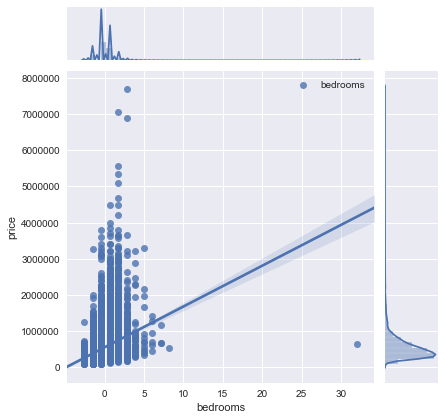

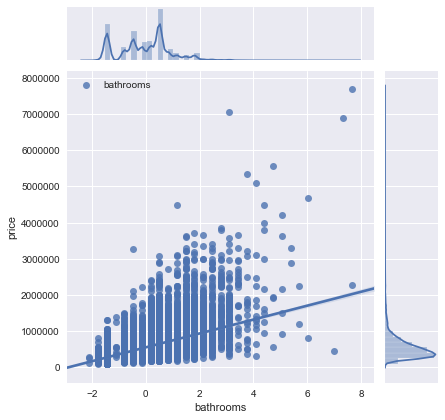

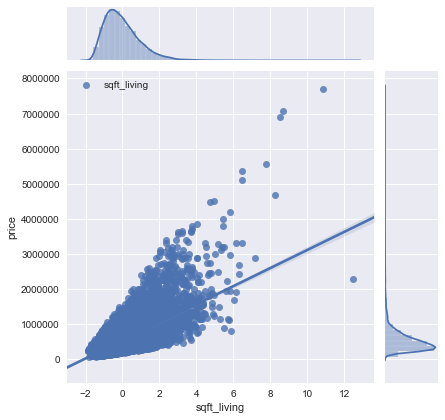

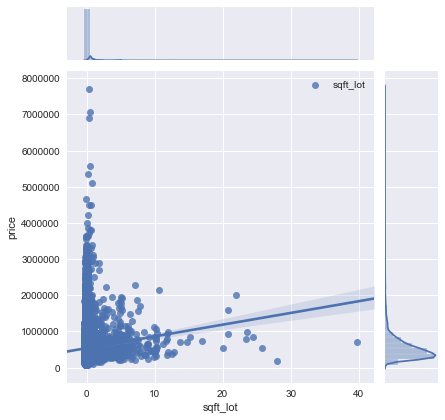

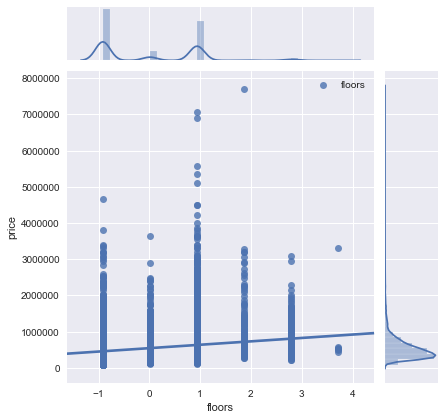

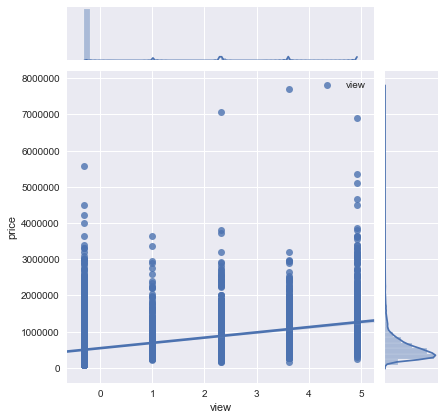

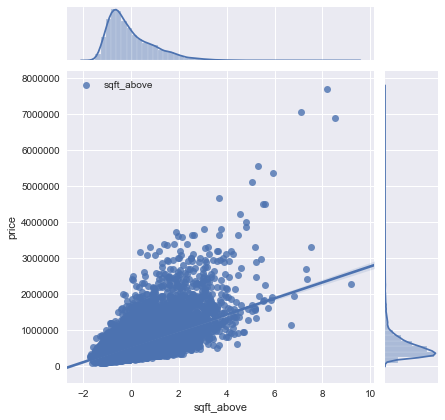

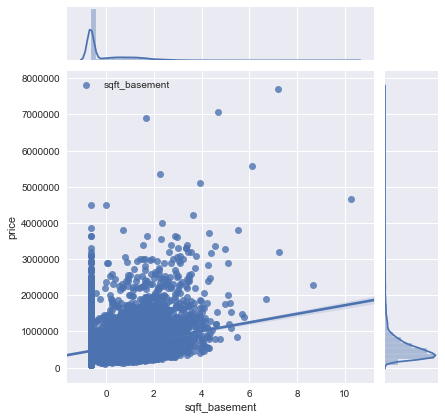

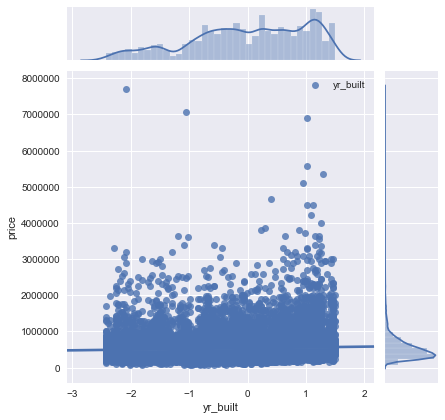

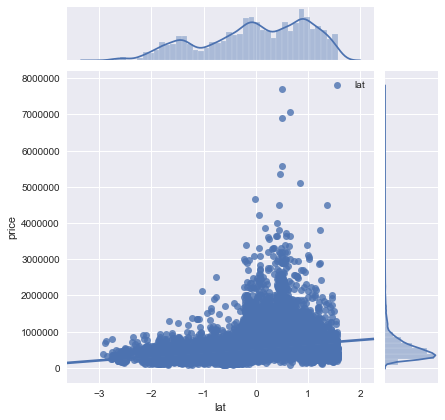

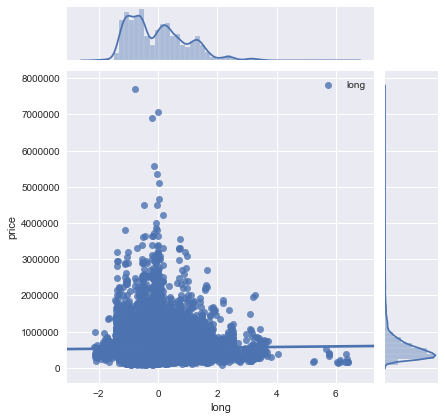

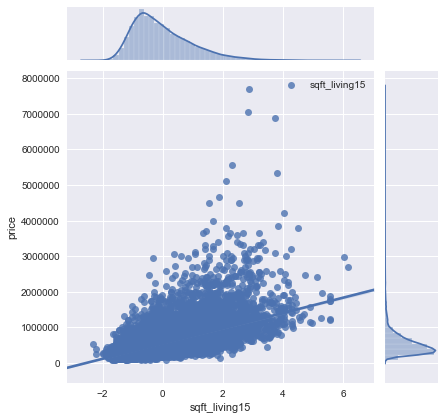

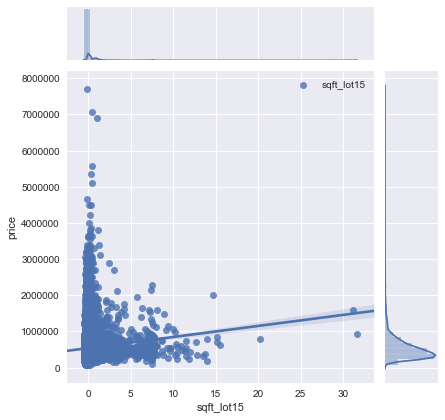

In [441]:
#lastly lets visualize them as joint plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

for column in kcdf.iloc[:,1:14].columns:
    sns.jointplot(x=column, y="price", data=kcdf,kind='reg', label=column,)
    #sns.regplot(kcdf[column], kcdf.price, label=column)
    plt.legend()
    plt.show()

In [442]:
#Observations

# Uniformity ----
# Some distributions are relatively uniformly distributed
# Others have multiple common values

# Normality -----
# Most of the variables break the normal assumption, which is problematic.
# Exceptions include Price, most of the sqft predictors, and view (sorta).

# Outliers -----
# There are obvious outliers in the bedroom column, but they are minimal.

# Linear relationship to Price --- 
# Bedrooms, bathrooms, sqft_living, sqft_above, sqft_living15, sqft_lot15 have a clear positive relationship with price.
# Sqft_lot, floors, view, sqft_basement, lat have a weak positive relationship with price
# Yr_built and lat has no clear realtionship with price.

# Step 4. Model

In [443]:
#Let's begin by looking at single linear regression models for all continuous variables
import statsmodels.formula.api as smf

col_names = kcdf.iloc[:,0:14]
col_names = col_names.drop(['price'],axis=1)
col_names = col_names.columns

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]

for idx, val in enumerate(col_names):
    print ("\nKCDF: price~" + val)
    print ("------------------------------")
    f = 'price~' + val
    model = smf.ols(formula=f, data=kcdf).fit()
    X_new = pd.DataFrame({val: [kcdf[val].min(), kcdf[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

pd.DataFrame(results)


KCDF: price~bedrooms
------------------------------
['bedrooms', 0.09514380839134184, 540246.8904752871, 113120.01945780392, 0.0]

KCDF: price~bathrooms
------------------------------
['bathrooms', 0.27565534211705833, 540246.8904752871, 192545.07397680086, 0.0]

KCDF: price~sqft_living
------------------------------
['sqft_living', 0.49280911924669435, 540246.8904752871, 257447.43745887777, 0.0]

KCDF: price~sqft_lot
------------------------------
['sqft_lot', 0.007814472143692908, 540246.8904752871, 32418.9563158288, 7.585998491378811e-38]

KCDF: price~floors
------------------------------
['floors', 0.0658450382176049, 540246.8904752871, 94104.57389679391, 0.0]

KCDF: price~view
------------------------------
['view', 0.15774906044067227, 540246.8904752871, 145657.41431009537, 0.0]

KCDF: price~sqft_above
------------------------------
['sqft_above', 0.36660773487327236, 540246.8904752871, 222049.6113491868, 0.0]

KCDF: price~sqft_basement
------------------------------
['sqft_base

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.0951438,540247,113120,0
2,bathrooms,0.275655,540247,192545,0
3,sqft_living,0.492809,540247,257447,0
4,sqft_lot,0.00781447,540247,32419,7.586e-38
5,floors,0.065845,540247,94104.6,0
6,view,0.157749,540247,145657,0
7,sqft_above,0.366608,540247,222050,0
8,sqft_basement,0.10434,540247,118461,0
9,yr_built,0.00300846,540247,20115.1,1.59351e-15


In [444]:
#Let's remove the continuous variables which had a R-squared value <0.01
kcdf = kcdf.drop(['sqft_lot','yr_built','long','sqft_lot15'],axis=1)

In [448]:
#and now lets do some organizing

kcdf = kcdf.rename(columns={'waterfront_0.0': 'waterfront_0', 'waterfront_1.0': 'waterfront_1'})
kcdf = kcdf.rename(columns={'binned_yr_renovated_(-1, 1]': 'bin_yr_ren_none', 
                            'binned_yr_renovated_(1933, 1953]': 'bin_yr_ren_1933_1953',
                            'binned_yr_renovated_(1953, 1973]': 'bin_yr_ren_1953_1973',
                            'binned_yr_renovated_(1973, 1993]': 'bin_yr_ren_1973_1993',
                            'binned_yr_renovated_(1993, 2016]': 'bin_yr_ren_1993_2016'})


#for col in kcdf.iloc[:,99:900].columns:
    #kcdf = kcdf.rename(columns={col: col[:-1] + ')'})

target = kcdf['price']
col_cont = kcdf.iloc[:,1:10].columns
col_wf = kcdf.iloc[:,10:13].columns
col_cond = kcdf.iloc[:,13:18].columns
col_grade = kcdf.iloc[:,18:29].columns
col_zip = kcdf.iloc[:,29:99].columns
col_yr_ren = kcdf.iloc[:,99:900].columns

Index(['bin_yr_ren_none', 'bin_yr_ren_1933_1953', 'bin_yr_ren_1953_1973',
       'bin_yr_ren_1973_1993', 'bin_yr_ren_1993_2016'],
      dtype='object')

In [463]:
cols = [col_wf , col_cond, col_grade, col_zip, col_yr_ren]

for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data= kcdf).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     512.7
Date:                Thu, 09 Apr 2020   Prob (F-statistic):          1.22e-321
Time:                        16:39:08   Log-Likelihood:            -2.9928e+05
No. Observations:               21082   AIC:                         5.986e+05
Df Residuals:                   21078   BIC:                         5.986e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.305e+15    2.1e+17      0.

In [450]:
#Let's break this down

#For waterfront - our R^2 is low and P Values are High. This is an obvious candidate to cut.
#For Condition - our pvalues are better here, but our R^2 is still too low.. Lets cut this too.
#For Grade – Good R^2 but terrble P values. Lets cut it.
#for Zipcode – Finally! A respectable R^2 and generally low pvalues. This is a keeper!
#YR_Rennovated – another low R^2 iand high P Values. Obvious candidate to cut.

#this leaves us only with Zipcode for our categorical data!

In [474]:
#let's make the neccessary adjusments

final_kcdf = kcdf.drop(col_wf,axis=1)
final_kcdf = final_kcdf.drop(col_cond,axis=1)
final_kcdf = final_kcdf.drop(col_grade,axis=1)
final_kcdf = final_kcdf.drop(col_yr_ren,axis=1)

#dropping one from the remaining cat data
final_kcdf = final_kcdf.drop(['zipcode_98136'],axis=1)

final_kcdf.shape

(21082, 79)

In [475]:
#now let's fit another model with all our selected predictors 

outcome = 'price'
x_cols = final_kcdf.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=final_kcdf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     944.4
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:47:30   Log-Likelihood:            -2.8415e+05
No. Observations:               21082   AIC:                         5.685e+05
Df Residuals:                   21003   BIC:                         5.691e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.159e+05   1.11e+04     55.474      0.000    5.94e+05    6.38e+05
bedrooms      -3.208e+04   1522.897    -21.066      0.000   -3.51e+04   -2.91e+04
bathrooms      1.772e+04   2047.605      8.656      0.000    1.37e+04    2.17e+04
sqft_living   -5.338e+08      8e+07     -6.672      0.000   -6.91e+08   -3.77e+08
floors        -2.795e+04   1719.050    -16.261      0.000   -3.13e+04   -2.46e+04
view           7.132e+04   1348.948     52.874      0.000    6.87e+04     7.4e+04
sqft_above      4.82e+08   7.22e+07      6.675      0.000     3.4e+08    6.24e+08
sqft_basement  2.571e+08   3.85e+07      6.674      0.000    1.82e+08    3.33e+08
lat            2.213e+04   9531.673      2.322      0.020    3446.899    4.08e+04
sqft_living15  1.523e+04   2079.937      7.321      0.000    1.12e+04    1.93e+04
zipcode_98001 -2.451e+05   2.14e+04    -11.460      0.000   -2.87e+05   -2.03e+05
zipcode_98002 -2.146e+05   2.29e+04     -9.371      0.000   -2.59e+05    -1.7e+05
zipcode_98003 -2.506e+05   2.16e+04    -11.596      0.000   -2.93e+05   -2.08e+05
zipcode_98004  5.204e+05   1.58e+04     32.880      0.000    4.89e+05    5.51e+05
zipcode_98005  5.681e+04   1.82e+04      3.120      0.002    2.11e+04    9.25e+04
zipcode_98006  1.355e+04   1.38e+04      0.984      0.325   -1.34e+04    4.05e+04
zipcode_98007 -7005.8189   1.91e+04     -0.367      0.713   -4.44e+04    3.04e+04
zipcode_98008 -5454.3923    1.6e+04     -0.341      0.733   -3.68e+04    2.59e+04
zipcode_98010 -1.754e+05   2.51e+04     -6.991      0.000   -2.25e+05   -1.26e+05
zipcode_98011 -1.886e+05   2.24e+04     -8.429      0.000   -2.32e+05   -1.45e+05
zipcode_98014 -2.074e+05   2.12e+04     -9.781      0.000   -2.49e+05   -1.66e+05
zipcode_98019 -2.343e+05   2.16e+04    -10.833      0.000   -2.77e+05   -1.92e+05
zipcode_98022 -2.422e+05   2.76e+04     -8.781      0.000   -2.96e+05   -1.88e+05
zipcode_98023 -2.619e+05   2.09e+04    -12.538      0.000   -3.03e+05   -2.21e+05
zipcode_98024 -1.308e+05   2.26e+04     -5.793      0.000   -1.75e+05   -8.66e+04
zipcode_98027 -9.022e+04   1.42e+04     -6.366      0.000   -1.18e+05   -6.24e+04
zipcode_98028  -1.86e+05   2.12e+04     -8.754      0.000   -2.28e+05   -1.44e+05
zipcode_98029 -4.853e+04   1.49e+04     -3.249      0.001   -7.78e+04   -1.93e+04
zipcode_98030 -2.466e+05   1.95e+04    -12.663      0.000   -2.85e+05   -2.08e+05
zipcode_98031 -2.339e+05   1.79e+04    -13.032      0.000   -2.69e+05   -1.99e+05
zipcode_98032 -2.296e+05   2.23e+04    -10.300      0.000   -2.73e+05   -1.86e+05
zipcode_98033  8.288e+04   1.69e+04      4.892      0.000    4.97e+04    1.16e+05
zipcode_98034 -9.192e+04   1.83e+04     -5.035      0.000   -1.28e+05   -5.61e+04
zipcode_98038 -2.296e+05   1.76e+04    -13.035      0.000   -2.64e+05   -1.95e+05
zipcode_98039  1.052e+06    2.8e+04     37.619   

In [476]:
#Our R^2 is good, and most of our pvalues are pretty good.

#We can remove zipcode_98006, zipcode_98007, zipcode_98008 for abnormally high p values
final_kcdf = final_kcdf.drop(['zipcode_98006'],axis=1)
final_kcdf = final_kcdf.drop(['zipcode_98007'],axis=1)
final_kcdf = final_kcdf.drop(['zipcode_98008'],axis=1)

final_kcdf.shape

(21082, 76)

In [515]:
#76 is still a lot of predictors. Let's explore using recursive feature elimination to get it down to ~20 elements.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pred = final_kcdf.drop(['price'],axis=1)

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 20)
selector = selector.fit(pred, final_kcdf["price"])

In [519]:
#lets see our results

for i in range(len(pred.columns)):
    if selector.support_[i] == True:
        print ("'" + pred.columns[i] + "'," )

'sqft_living',
'sqft_above',
'sqft_basement',
'zipcode_98004',
'zipcode_98023',
'zipcode_98033',
'zipcode_98039',
'zipcode_98040',
'zipcode_98092',
'zipcode_98102',
'zipcode_98103',
'zipcode_98105',
'zipcode_98107',
'zipcode_98109',
'zipcode_98112',
'zipcode_98115',
'zipcode_98117',
'zipcode_98119',
'zipcode_98122',
'zipcode_98199',


In [524]:
final_kcdf_2 = final_kcdf[['price',
                           'sqft_living',
                           'sqft_above',
                           'sqft_basement',
                           'zipcode_98004',
                           'zipcode_98023',
                           'zipcode_98033',
                           'zipcode_98039',
                           'zipcode_98040',
                           'zipcode_98092',
                           'zipcode_98102',
                           'zipcode_98103',
                           'zipcode_98105',
                           'zipcode_98107',
                           'zipcode_98109',
                           'zipcode_98112',
                           'zipcode_98115',
                           'zipcode_98117',
                           'zipcode_98119',
                           'zipcode_98122',
                           'zipcode_98199']]

In [525]:
#lets try the fit again and see the impact on R^2

outcome = 'price'
x_cols = final_kcdf_2.drop(['price'],axis=1).columns

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = smf.ols(formula=formula, data=final_kcdf_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     2197.
Date:                Fri, 10 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:26:47   Log-Likelihood:            -2.8815e+05
No. Observations:               21082   AIC:                         5.763e+05
Df Residuals:                   21061   BIC:                         5.765e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.786e+05   1665.401    287.400      0.000    4.75e+05    4.82e+05
sqft_living   -5.422e+08   9.63e+07     -5.633      0.000   -7.31e+08   -3.54e+08
sqft_above     4.896e+08   8.69e+07      5.635      0.000    3.19e+08     6.6e+08
sqft_basement  2.612e+08   4.64e+07      5.635      0.000     1.7e+08    3.52e+08
zipcode_98004  6.617e+05    1.2e+04     55.219      0.000    6.38e+05    6.85e+05
zipcode_98023   -1.7e+05   9639.938    -17.630      0.000   -1.89e+05   -1.51e+05
zipcode_98033  2.432e+05   1.03e+04     23.662      0.000    2.23e+05    2.63e+05
zipcode_98039   1.21e+06      3e+04     40.315      0.000    1.15e+06    1.27e+06
zipcode_98040  4.406e+05   1.28e+04     34.298      0.000    4.15e+05    4.66e+05
zipcode_98092 -1.788e+05   1.15e+04    -15.594      0.000   -2.01e+05   -1.56e+05
zipcode_98102  4.078e+05    2.1e+04     19.460      0.000    3.67e+05    4.49e+05
zipcode_98103  2.211e+05   8809.437     25.095      0.000    2.04e+05    2.38e+05
zipcode_98105  3.704e+05    1.4e+04     26.441      0.000    3.43e+05    3.98e+05
zipcode_98107   2.34e+05    1.3e+04     17.943      0.000    2.08e+05     2.6e+05
zipcode_98109  4.095e+05   2.05e+04     20.015      0.000    3.69e+05     4.5e+05
zipcode_98112  5.098e+05   1.31e+04     38.951      0.000    4.84e+05    5.35e+05
zipcode_98115  2.089e+05   8984.770     23.246      0.000    1.91e+05    2.26e+05
zipcode_98117  2.028e+05   9175.821     22.105      0.000    1.85e+05    2.21e+05
zipcode_98119  4.048e+05   1.58e+04     25.554      0.000    3.74e+05    4.36e+05
zipcode_98122  2.378e+05   1.26e+04     18.929      0.000    2.13e+05    2.62e+05
zipcode_98199  2.992e+05    1.2e+04     24.994      0.000    2.76e+05    3.23e+05
==============================================================================
Omnibus:                    16928.142   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1182022.179
Skew:                           3.365   Prob(JB):                         0.00
Kurtosis:                      39.060   Cond. No.                     1.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Our R^2 has gone down but is still not bad! And the model is much simpler. 

In [581]:
#now let's take a look at the MSE for this model using 5-fold cross-validation

np.random.seed(8)
from sklearn.metrics import mean_squared_error

y = final_kcdf_2["price"]
X = final_kcdf_2.drop(["price"], axis=1)


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

int(np.mean(cv_5_results))

-43878349544

In [582]:
#and let's compare it to the MSE for the more complex model using 5-fold cross-validation

y = final_kcdf["price"]
X = final_kcdf.drop(["price"], axis=1)


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")

int(np.mean(cv_5_results))

-2332859120073416508440576

In [ ]:
#Wow the MSE is much improved for our simplified model. So let's stick with that!

# Step 5. iNterpert

* Ultimately our final model was able to explain 67.6% of the variation in the response variable around its mean. The Every predictor had a p-value of 0 in the final model.
* Although an earlier model with more predictors had a higher R^2 of 77.8%, we ultimately chose the model with lower R^2 after conducting 5-fold cross-validation on each model and finding the latter had a better MSE. 
* Interestingly, many of the 'expected' predictors, such as # of bathrooms and bedrooms, didn't make their way into the final model. The remaining predictors were sqft_living, sqft_above, sqft_basement, and a high-performing selection of predictors. 